In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
#Import data
info_csv = pd.read_csv('../datasets/parsed_dataset.csv')

In [16]:
target = info_csv['malicious']
info_csv = info_csv.drop('malicious', axis=1)

In [17]:
info_csv.head()

,dport,having_ip_address,hostname_length,count_dir,count-www,fd_length,url_length,abnormal_url,count-http,count-letters,...,count-digits,count-,count=,count-https,sus_url,count?,count%,short_url,count@,count_embed_domain
0,80,False,0,0,0,0,16,0,0,13,...,0,1,0,0,0,0,0,0,0,0
1,80,False,0,2,0,5,35,0,0,29,...,1,0,0,0,0,0,0,0,0,0
2,80,False,0,3,0,7,31,0,0,25,...,1,0,0,0,0,0,0,0,0,0
3,80,False,21,1,1,9,88,1,1,63,...,7,1,4,0,0,1,0,0,0,0
4,80,False,23,1,0,9,235,1,1,199,...,22,1,3,0,0,1,0,0,0,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(info_csv, target, test_size=0.30)

In [19]:
pca = PCA(n_components=None)
pca.fit(X_train)

PCA()

In [20]:
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
print(len(exp_var))

22


<BarContainer object of 22 artists>

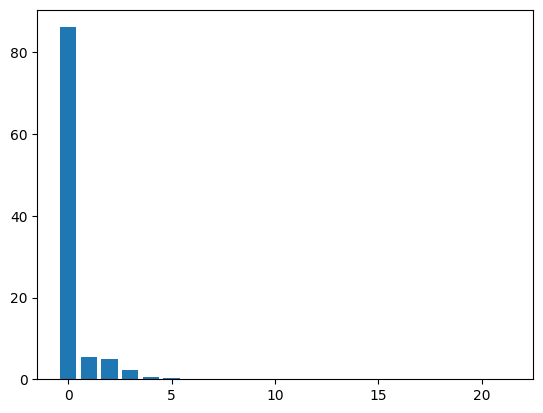

In [21]:
plt.bar(range(len(exp_var)), exp_var, align='center',
        label='Individual explained variance')

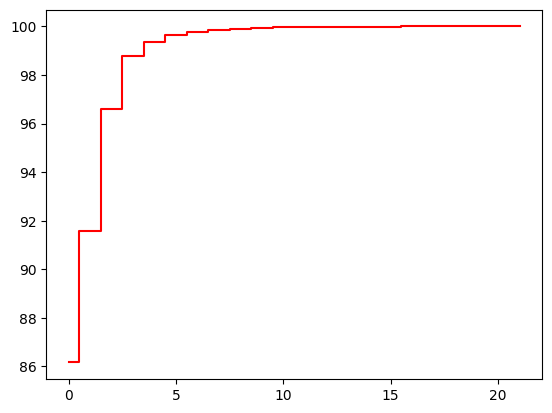

In [22]:
plt.step(range(len(cum_exp_var)), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

In [23]:
# Create an instance of the PCA class
pca2 = PCA(n_components=2)

In [24]:
# Fit the PCA model to your data
pca2.fit(X_train)

PCA(n_components=2)

In [25]:
# Transform the data to the first two principal components
X_train_pca2 = pca2.transform(X_train)

In [26]:
# Plot the transformed data
#sns.scatterplot(X_train_pca2[:, 0], X_train_pca2[:, 1], palette=['green', 'blue'])
#plt.show()

In [27]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_pca2, y_train)

RandomForestClassifier(n_estimators=500)

In [28]:
X_test_pca2 = pca2.transform(X_test)

In [29]:
output_predictions = rfc.predict(X_test_pca2)

In [30]:
print(confusion_matrix(y_test,output_predictions))

[[ 4379  2341]
 [ 1454 17194]]


In [31]:
print(classification_report(y_test,output_predictions))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      6720
           1       0.88      0.92      0.90     18648

    accuracy                           0.85     25368
   macro avg       0.82      0.79      0.80     25368
weighted avg       0.85      0.85      0.85     25368

